# Total, excess and price returns
#### Authour: Prof. Gustavo Soares

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### BQNT

If you are using BQNT you should import and initialize the BQL service:

In [2]:
import bql
bq = bql.Service()

Grab the time series for the price of Bank of Amercia stock (BAC):

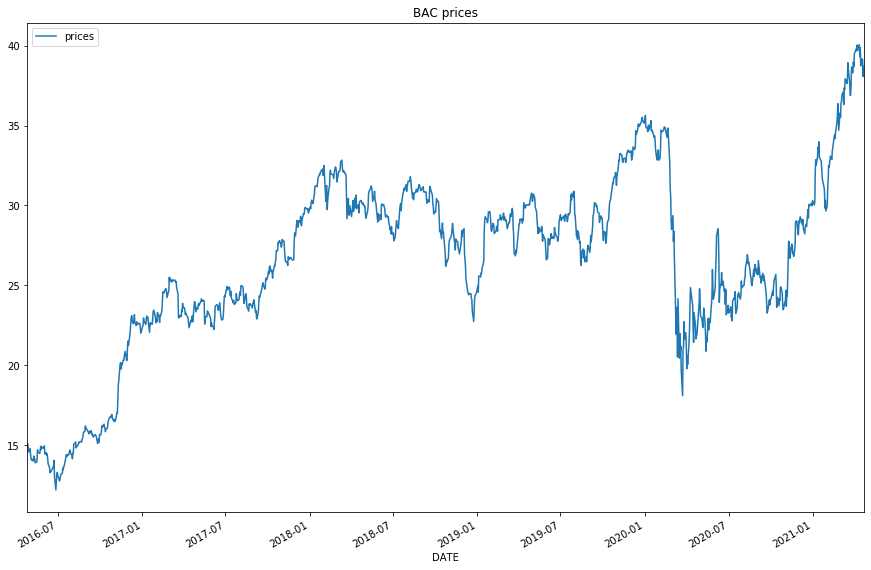

In [9]:
request = "get(PX_LAST(dates = range( -5Y , 0D))) for('BAC US Equity')"
res = bq.execute(request)
prices = bql.combined_df(res).drop('CURRENCY', 1).set_index('DATE').dropna().iloc[:, 0].to_frame('prices')
prices.plot(figsize=(15,10), title='BAC prices')
plt.show()

Grab the time series for the total return index of Bank of Amercia stock (BAC):

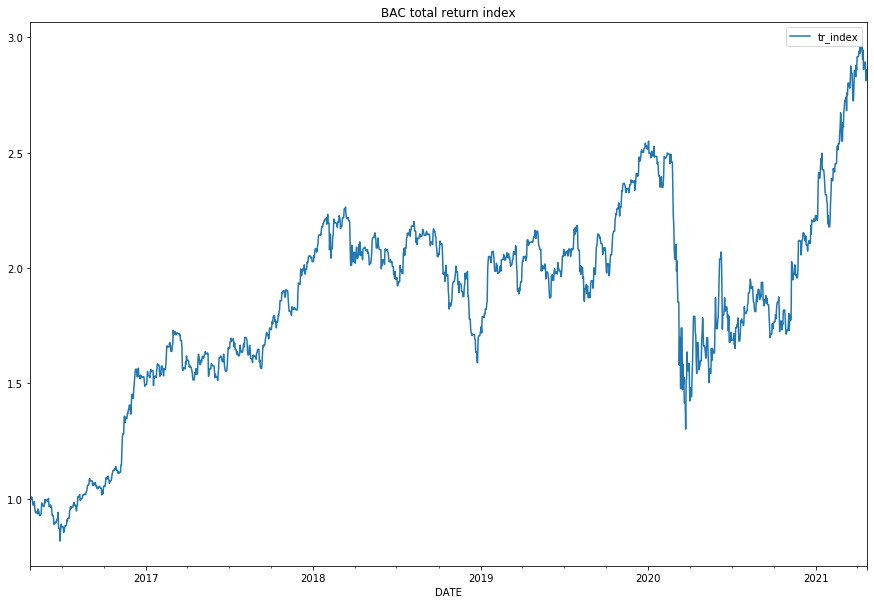

In [17]:
request = "get(TOTAL_RETURN_INDEX( dates = range( -5Y , 0D))) for('BAC US Equity')"
res = bq.execute(request)
tr = bql.combined_df(res).set_index('DATE').dropna().iloc[:, 0].to_frame('tr_index')
tr.plot(figsize=(15,10), title='BAC total return index')
plt.show()

## Total return index vs. price index

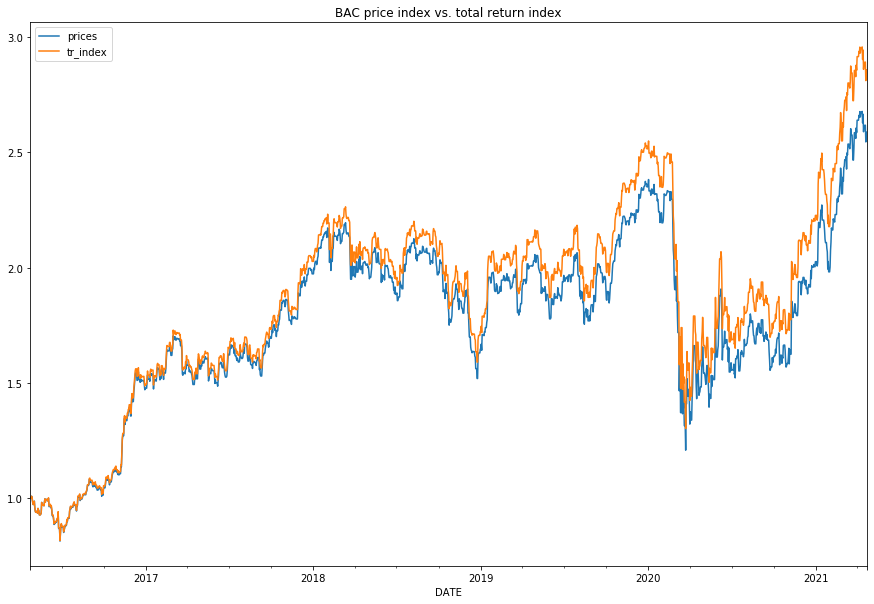

In [24]:
df = pd.concat([prices, tr], join='outer', axis=1, sort=True)
df2 = (1 + df.pct_change(1).fillna(0)).cumprod()
df2.plot(figsize=(15,10), title='BAC price index vs. total return index')
plt.show()

In [33]:
print('These are the price returns and total returns over the periods:')
(df2.iloc[-1]/df2.iloc[0]-1).apply(lambda x : f'{x:.2%}')

These are the price returns and total returns over the periods:


prices      156.42%
tr_index    183.21%
dtype: object

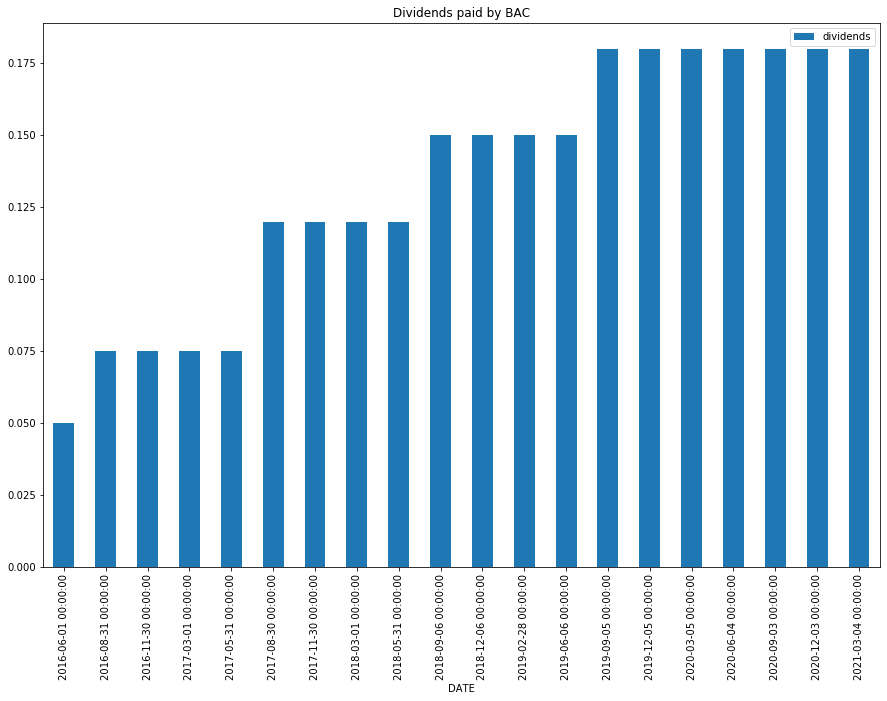

In [54]:
request = "get(CASH_DIVS(dates = range( -5Y , 0D))) for('BAC US Equity')"
res = bq.execute(request)
dvd = bql.combined_df(res).dropna().drop('CURRENCY', 1).set_index('DATE').dropna().iloc[:, 0].to_frame('dividends')
dvd.plot(kind='bar', figsize=(15,10), title='Dividends paid by BAC')
plt.show()

## Excess return index

In order to calculate excess returns we have to subtract the returns of the risk-free asset from the asset returns. Let's start by grabbing the 

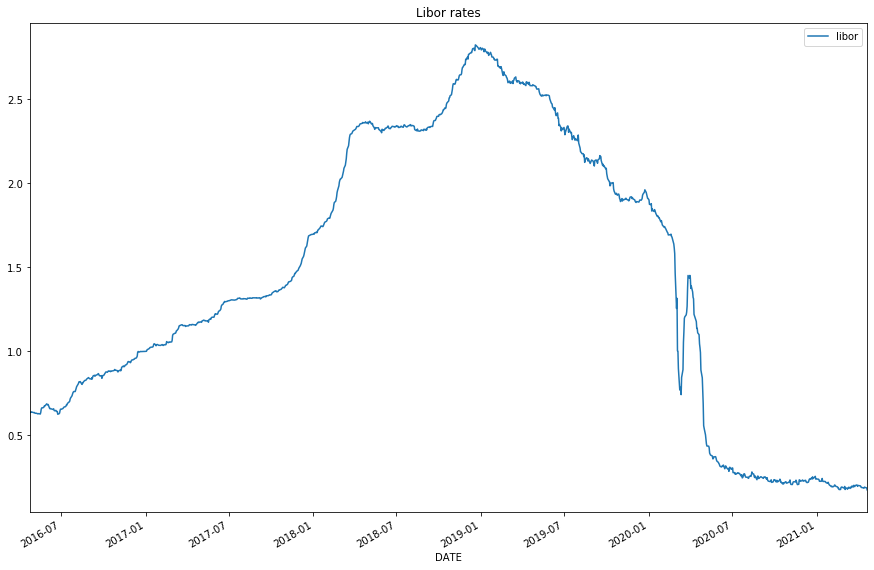

In [61]:
request = "get(PX_LAST( dates = range( -5Y , 0D))) for('US0003M Index')"
res = bq.execute(request)
bql.combined_df(res)
rf = bql.combined_df(res).drop('CURRENCY', 1).set_index('DATE').dropna().iloc[:, 0].to_frame('libor')
rf.plot(figsize=(15,10), title='Libor rates')
plt.show()

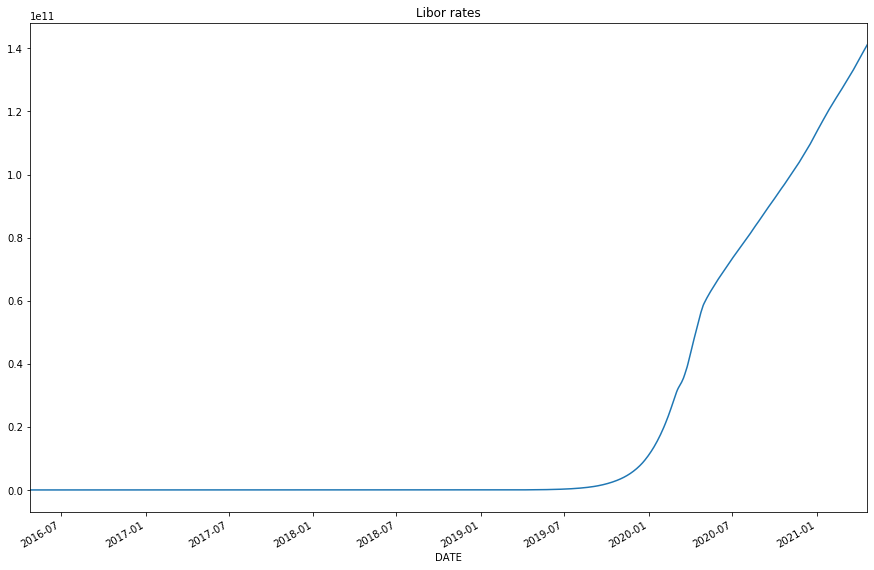

In [71]:
rf['dc'] = [1] + [(t1-t0).days for t1, t0 in zip(rf.index[1:],rf.index[:-1])]
rf['accrual'] = rf['dc'] * rf['libor']/100
rf['risk_free_index'] = (1 + rf['accrual']).cumprod()
rf['risk_free_index'].plot(figsize=(15,10), title='Libor rates')
plt.show()